 ## **Import Libaries**

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten, MaxPooling2D,Conv2D

11493376/11490434 [==============================] - 0s 0us/step
/content
/content/drive/MyDrive/EE4802


 ## **Data Preparation and Exploration**

Original shape of train_X: (60000, 28, 28) 

New shape of train_X: (60000, 28, 28, 1) 

New shape of test_X: (10000, 28, 28, 1) 

Shape of train_y: (60000,) 

7


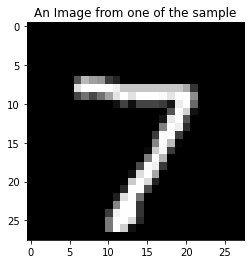

In [ ]:
print(f"Original shape of train_X: {train_X.shape} \n")
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],train_X.shape[2],1)
print(f"New shape of train_X: {train_X.shape} \n")

test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],test_X.shape[2],1)
print(f"New shape of test_X: {test_X.shape} \n")

print(f"Shape of train_y: {train_y.shape} \n")

def plot_sample_image(X):
  plt.figure(figsize=(4,4))
  plt.title("An Image from one of the sample")
  plt.imshow(X[0][:,:,0], cmap='gray');

plot_sample_image(test_X[0:1])
print(test_y[0])

 ## **Define a function create and compile model**

In [ ]:
def create_model():
  tf.random.set_seed(77)
  initializer = keras.initializers.GlorotUniform()
  model = Sequential([ Conv2D(filters=16, kernel_size=(3,3), activation='relu', kernel_initializer=initializer,input_shape=(28,28,1)),
                      MaxPooling2D(pool_size=(2,2)),
                      Flatten(),
                      Dense(units=50, activation='relu'   , kernel_initializer=initializer),
                      Dense(units=10, activation='softmax', kernel_initializer=initializer)
                  
  ])

  optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                135250    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 135,920
Trainable params: 135,920
Non-trainable params: 0
_________________________________________________________________
None


 ## **Train a model with all 60,000 training examples with 10 epochs**

In [ ]:

history = model.fit(train_X,train_y, epochs=10, batch_size=32, verbose=2)
model.save('EE4802_Tutorial_4.h5') 

Epoch 1/10
1875/1875 - 16s - loss: 0.8711 - accuracy: 0.7811
Epoch 2/10
1875/1875 - 16s - loss: 0.4372 - accuracy: 0.8645
Epoch 3/10
1875/1875 - 16s - loss: 0.4094 - accuracy: 0.8715
Epoch 4/10
1875/1875 - 16s - loss: 0.3945 - accuracy: 0.8769
Epoch 5/10
1875/1875 - 16s - loss: 0.3859 - accuracy: 0.8788
Epoch 6/10
1875/1875 - 16s - loss: 0.3812 - accuracy: 0.8818
Epoch 7/10
1875/1875 - 16s - loss: 0.3774 - accuracy: 0.8824
Epoch 8/10
1875/1875 - 16s - loss: 0.3717 - accuracy: 0.8852
Epoch 9/10
1875/1875 - 16s - loss: 0.3648 - accuracy: 0.8876
Epoch 10/10
1875/1875 - 16s - loss: 0.3596 - accuracy: 0.8884


In [ ]:
# Using the trained model to predict
saved_model = keras.models.load_model('EE4802_Tutorial_4.h5')
saved_model.predict(test_X[0:1])

array([[5.6200822e-10, 3.1760172e-07, 1.2470922e-05, 7.9148613e-06,
        5.6718154e-06, 4.3521982e-07, 4.8730679e-11, 9.9993944e-01,
        1.6296550e-06, 3.2165462e-05]], dtype=float32)

## **Define a function to split the training set into k folds**

In [ ]:
# Note the difference
print(train_X.shape)
print(train_X[0].shape)
print(train_X[[0,3,5]].shape)

def eval_cnn_model(X,y,n_splits):
  history=[]
  kf_n = KFold(n_splits=n_splits, shuffle=True)

  for train_index, test_index in kf_n.split(X):
    model = create_model()
    history.append( model.fit(X[train_index],y[train_index],validation_data=(X[test_index], \
                    y[test_index]), batch_size=32,epochs=10, verbose=2)  )
  
  return history

# Note thst each history.history is a dictionary
# {'val_loss':[...], 'val_accuracy':[...], 'loss':[...], 'accuracy':[...] }


In [ ]:
# Train and eveluate the model on the kth fold
histories = eval_cnn_model(train_X,train_y,2)

In [ ]:
def summarize_diagnostics(histories):

  plt.figure(figsize=(6,6))

  for i in range(len(histories)):
    # plot loss
    plt.subplot(2, 1, 1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(2, 1, 2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
  plt.show()

2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


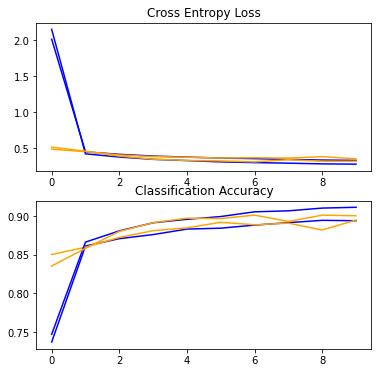

In [ ]:
#print(histories[0].history)
print(len(histories))
summarize_diagnostics(histories)